## Domanda Teorica

Descrivere con proprie parole (not CHAT-GPT oriented) il concetto di time series forecasting e cosa lo differenzia dai problemi ri regressione standard, fornendo esempi ed applicazioni/limiti.

Le time series necessitano che i dati siano ordinati in quanto sono dipendenti sul tempo. La singola feature deve essere ordinata temporalmente in modo da verificare che vi sia una correlazione con il tempo. Per quanto riguarda i modelli di regressione standard, invece, l'ordine dei dati non è importante, per cui si assume non ci sia correlazione tra di essi. Un buon metodo per verificare se si sta trattando un problema di time series è l'autocorrelazione della feature con il tempo.

ESEMPIO DI NON CORRELAZIONE

In [71]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/DailyTotalFemaleBirths.csv'

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]


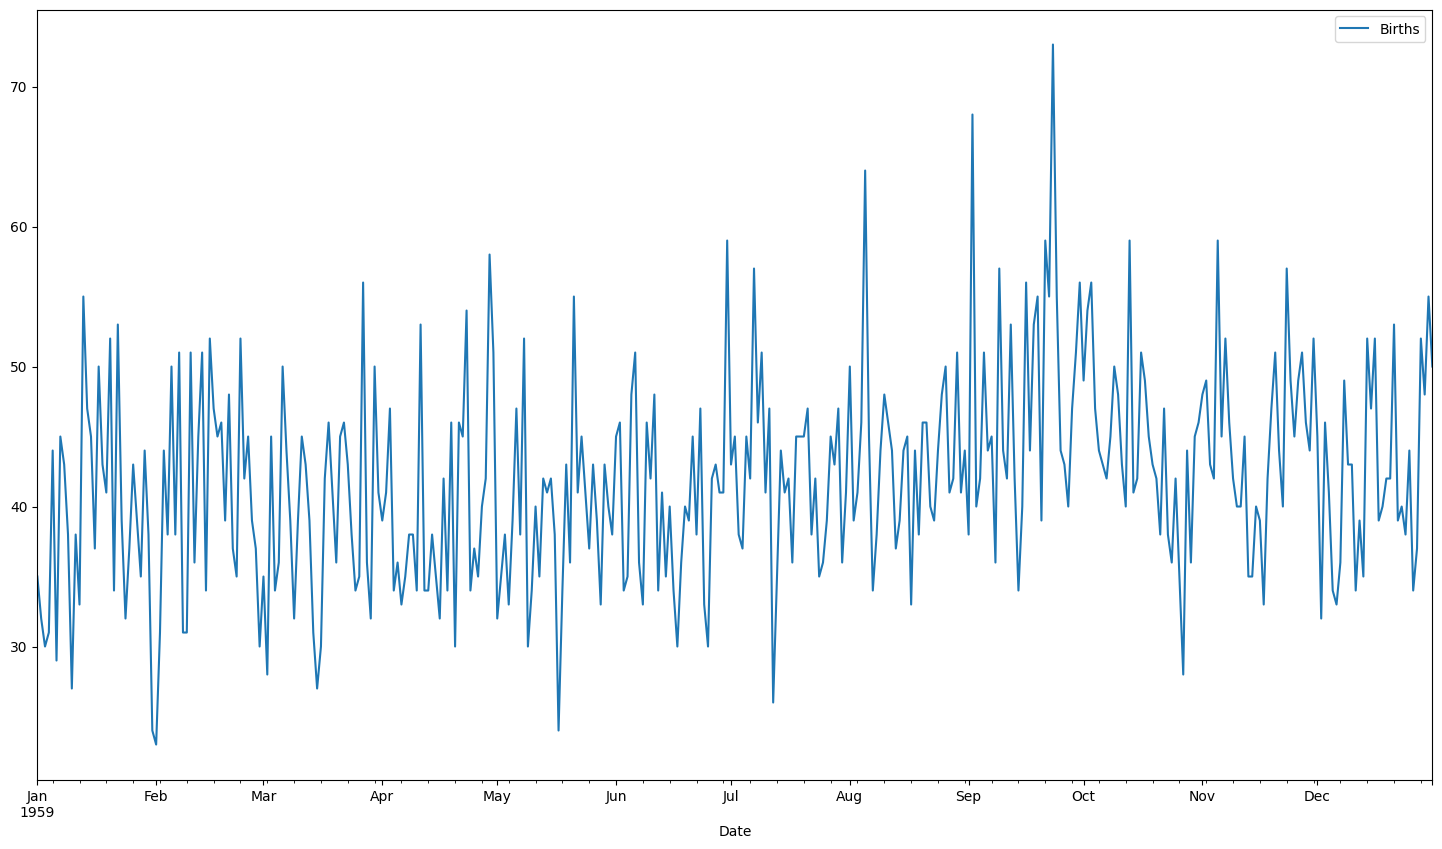

In [73]:

import pandas as pd
df3 = pd.read_csv(path,
                  index_col='Date',
                  parse_dates=True)
df3.index.freq = 'D'
print(df3)
df3.plot(figsize=(18,10));

Con il lagplot evidenziamo che non c'è correlazione con il tempo, quindi non si puo trattare come time series

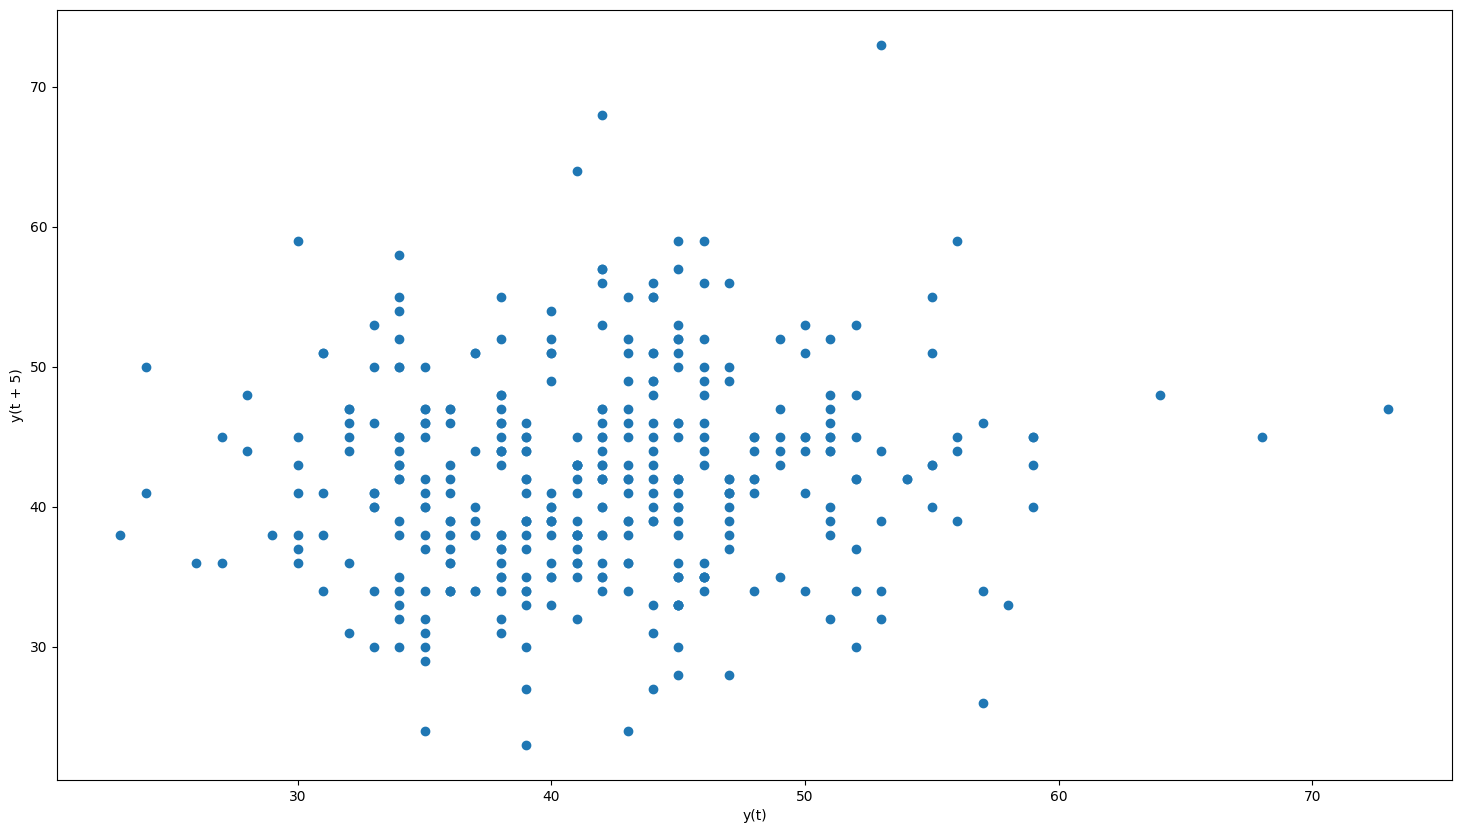

In [74]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
plt.figure(figsize=(18,10))
lag_plot(df3['Births'],lag=5);

ESEMPIO DI CORRELAZIONE CON IL TEMPO

In [76]:
path2='https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/airline_passengers.csv'

In [79]:
df_pass = pd.read_csv(path)
df_pass['Thousands of Passengers']

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Thousands of Passengers, Length: 144, dtype: int64

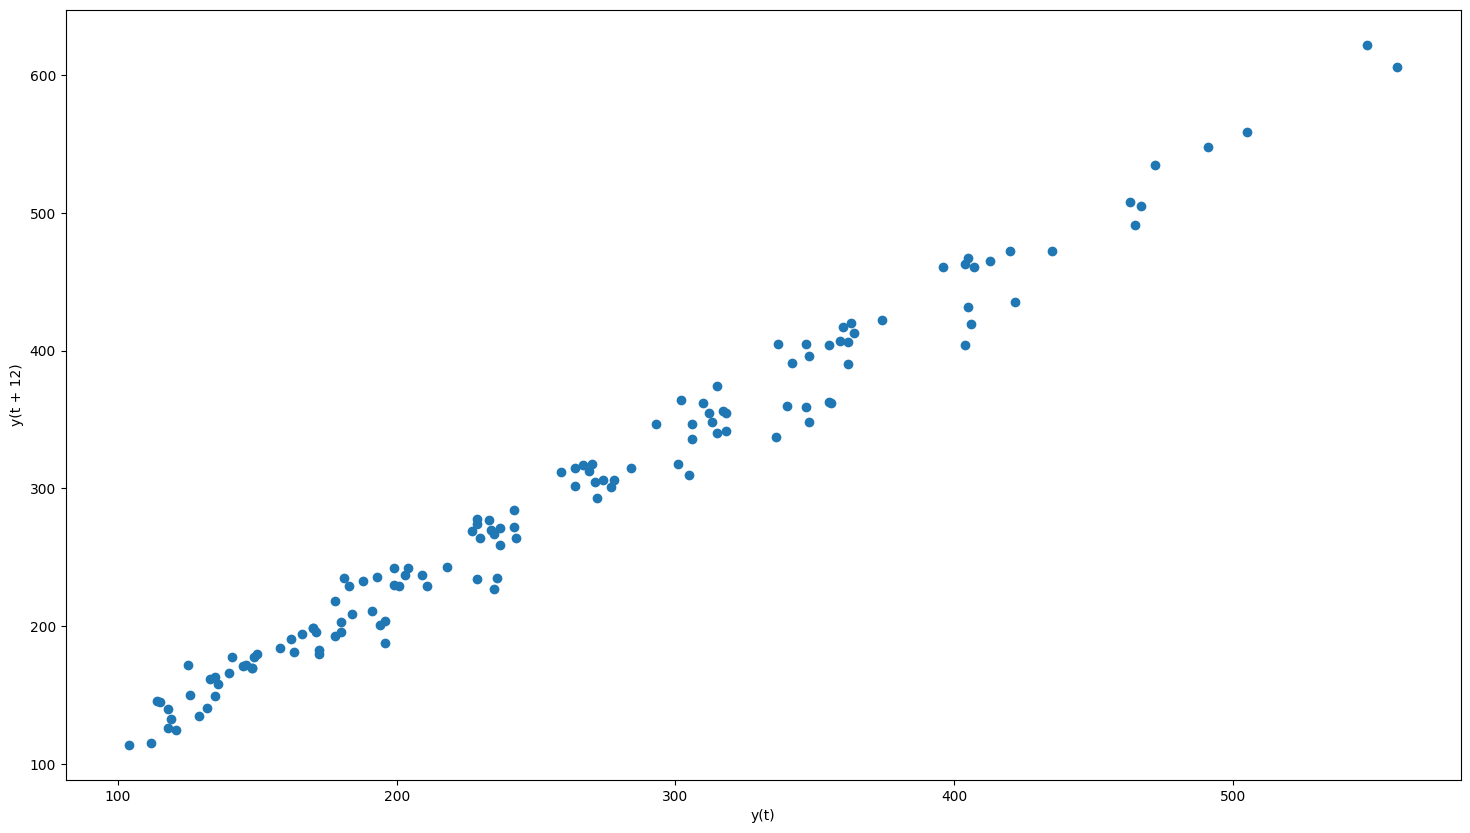

In [81]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

plt.figure(figsize=(18,10))
lag_plot(df_pass['Thousands of Passengers'],lag=12);

## Fake news Detection

In [1]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv
path_fake = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv'
path_true = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv'

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_fake = pd.read_csv(path_fake)
df_true = pd.read_csv(path_true)
df_fake["class"] = 0 #fake
df_true["class"] = 1 #real

df_marge = pd.concat([df_fake, df_true], axis =0 )
df = df_marge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,text,class
0,WASHINGTON (Reuters) - The U.S. military said ...,1
1,Ahmad Rahami has been identified as a suspect ...,0
2,A new report from Harvard Kennedy School s Sho...,0
3,A must read that pretty much tells you like it...,0
4,"According to a family friend, Barack Obama has...",0
...,...,...
44893,NEW YORK (Reuters) - Four U.S. states have sue...,1
44894,This story is a perfect example of why Barack ...,0
44895,BEIRUT (Reuters) - The leader of Lebanon s Hez...,1
44896,BOSTON (Reuters) - FBI Director James Comey sa...,1


In [4]:
df.text.isnull().sum()

0

In [106]:
patterns = {
            r"UTC]": '',
            r"b'": '',
            r'\d+': '',      
            r'[^\w\s]': '',  
            r'\b\w{1,2}\b':'',
            r'(http|www)[^\s]+':'',
            r' said ': '', 
            r' say ': '',
            r'\s+': ' '   
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
        df[column] = df[column].str.strip()
    return df

In [107]:
cleaned_df = clean_column(df, 'text', patterns)

In [108]:
cleaned_df.iloc[0][0]

'washington reutersmilitaryfridayfourth soldier was killed during attack wednesday niger raisingdeath toll from incidenthas thrown spotlightcounterterrorism missionwest african nationunited states had previously announcedthree army special forces soldiers had been killedanother two wounded when joint usnigerien patrol came under attack nearvillage tongo tongo did not disclose until fridayfourth soldier had been missing officialshis body was found nigerien forces friday morning nearsiteambush ending extensive rescuerecovery mission group has taken responsibility forkillings although officials speaking condition anonymitythe united states suspects local branch islamic state was responsiblemilitary africa command declined publicly name any group butthe american military would hunt downinsurgents absolutely are resolvedstalwart our efforts after those who attacked this joint patrol nigerienforcesarmy colonel mark cheadle spokesman formilitary africa command from initial accountsmember patr

In [109]:
all_text = " ".join(row for row in cleaned_df['text'])

In [110]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(['new', 'now', 'amp', 'will', 'dont', 'said', 'say', 'with', 'was', 'his', 'this'])
wordcloud = WordCloud(width = 3000, height = 2000,background_color='white',stopwords=stopwords)
wordcloud.generate(all_text)

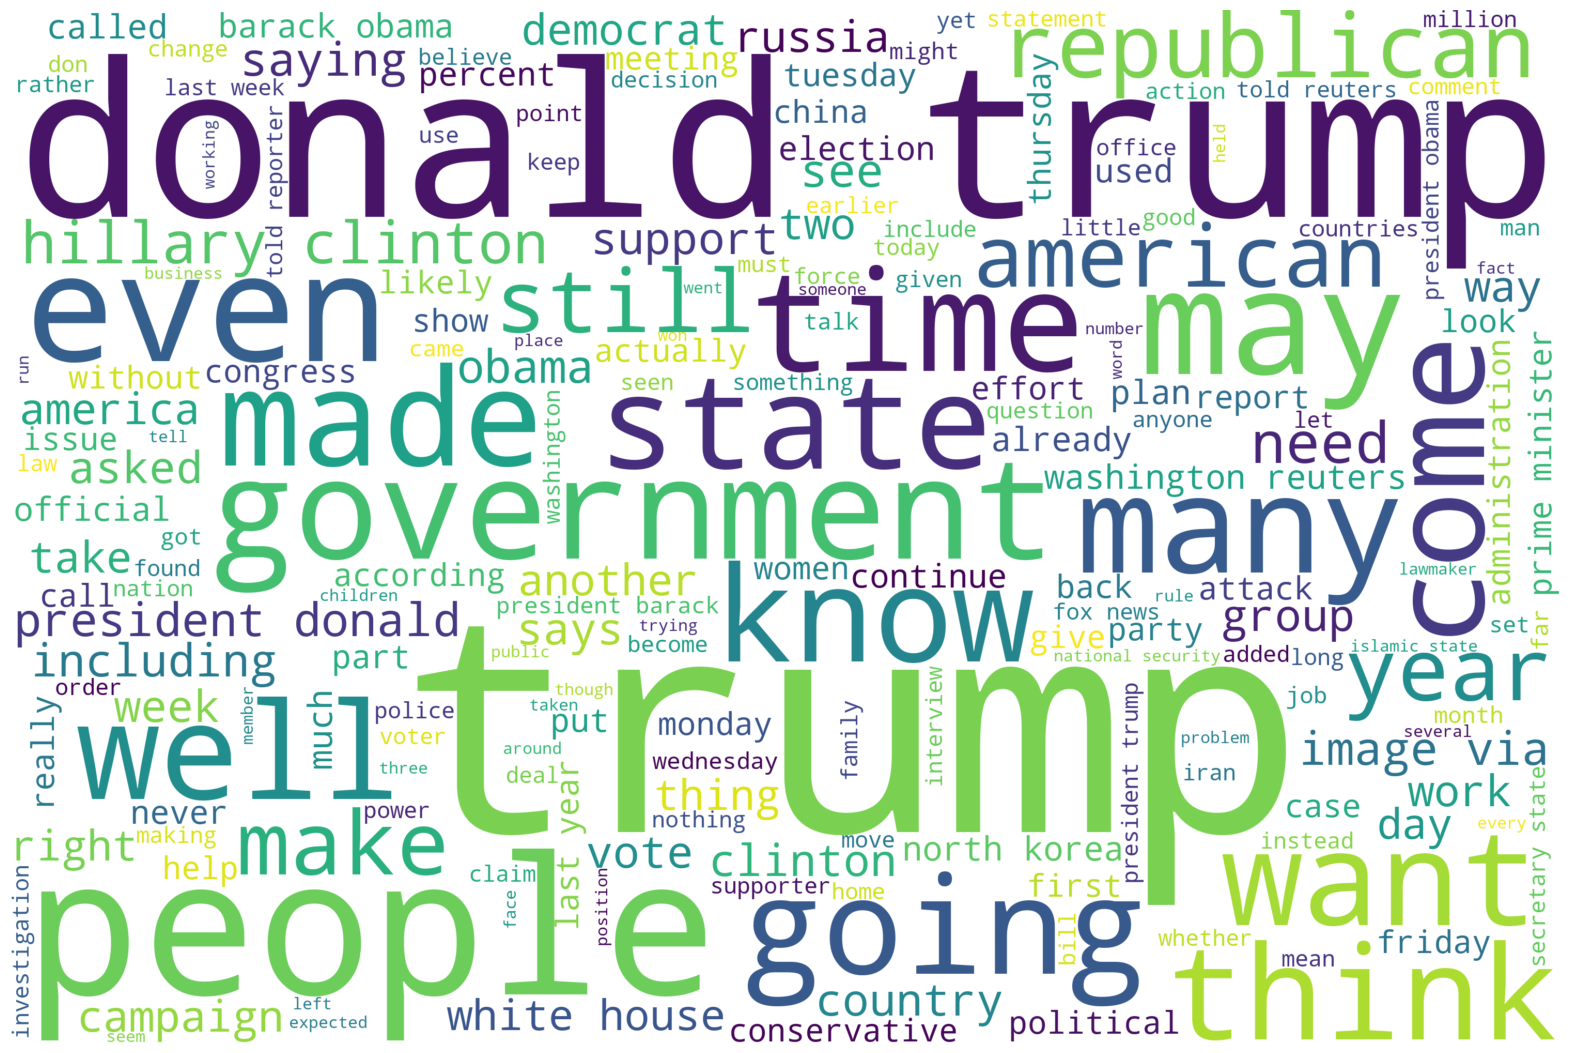

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [112]:
text_target_1 = cleaned_df.loc[cleaned_df['class'] == 1, 'text']
text_target_0 = cleaned_df.loc[cleaned_df['class'] == 0, 'text']

all_text_target_0 = " ".join(row for row in text_target_0)
all_text_target_1 = " ".join(row for row in text_target_1)

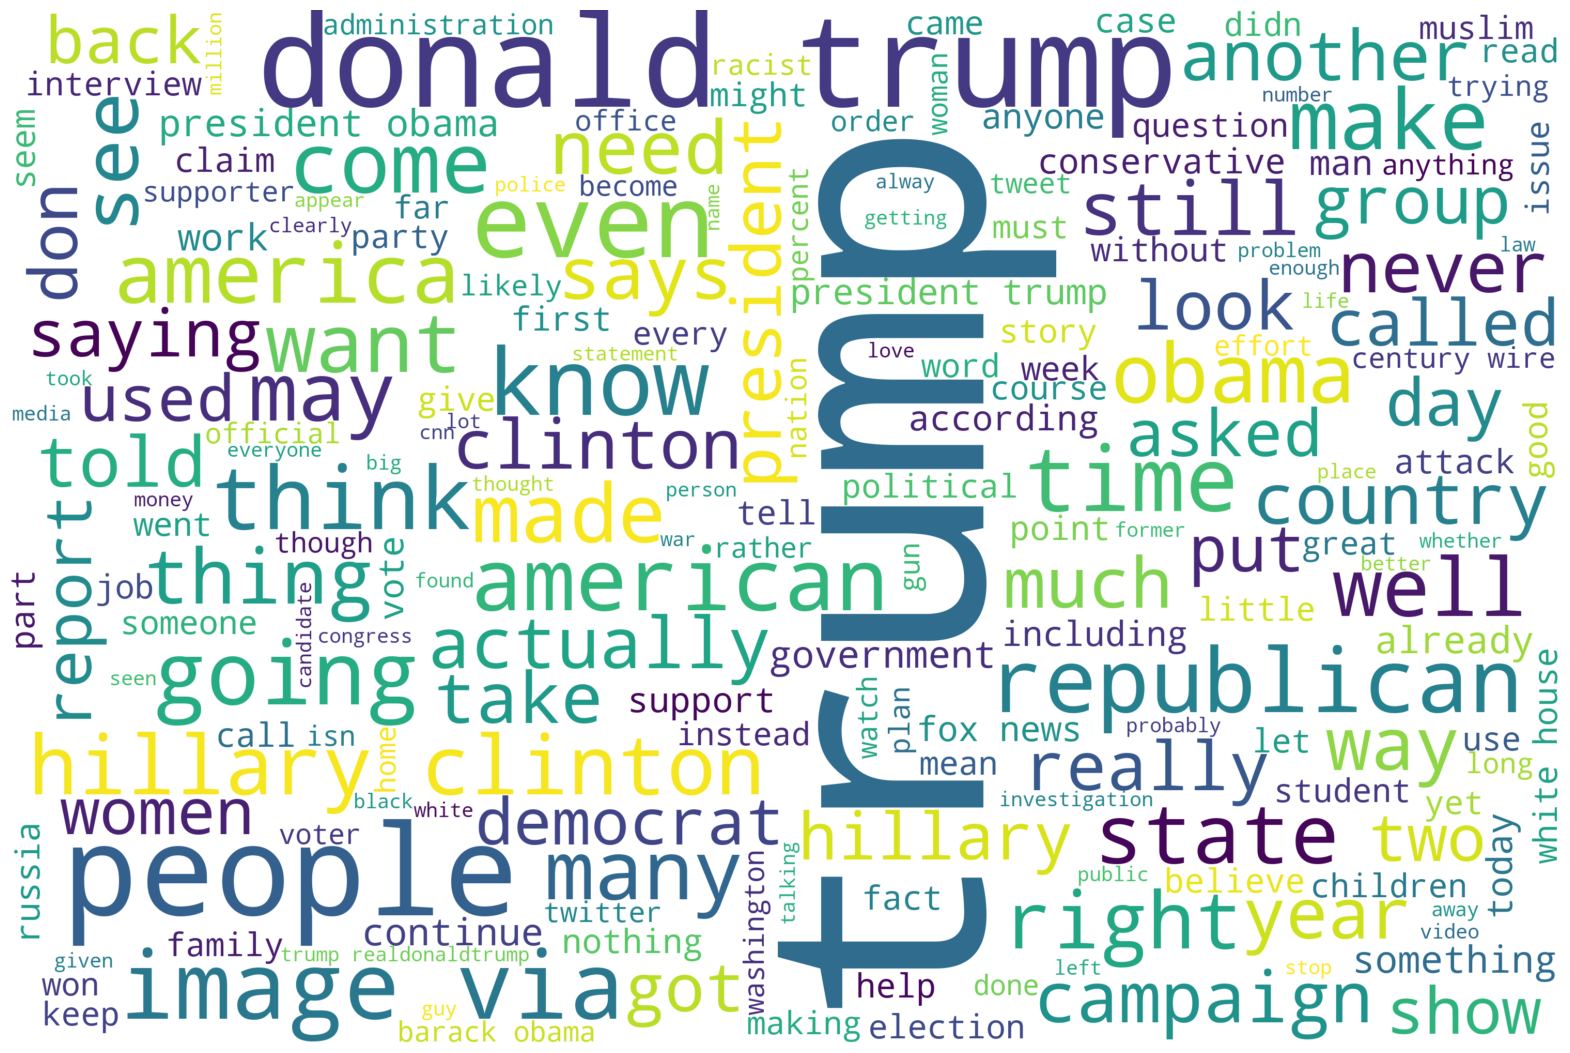

In [113]:
wordcloud0 = WordCloud(width = 3000, height = 2000,background_color='white',stopwords=stopwords)
wordcloud0.generate(all_text_target_0)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis("off")
plt.show()

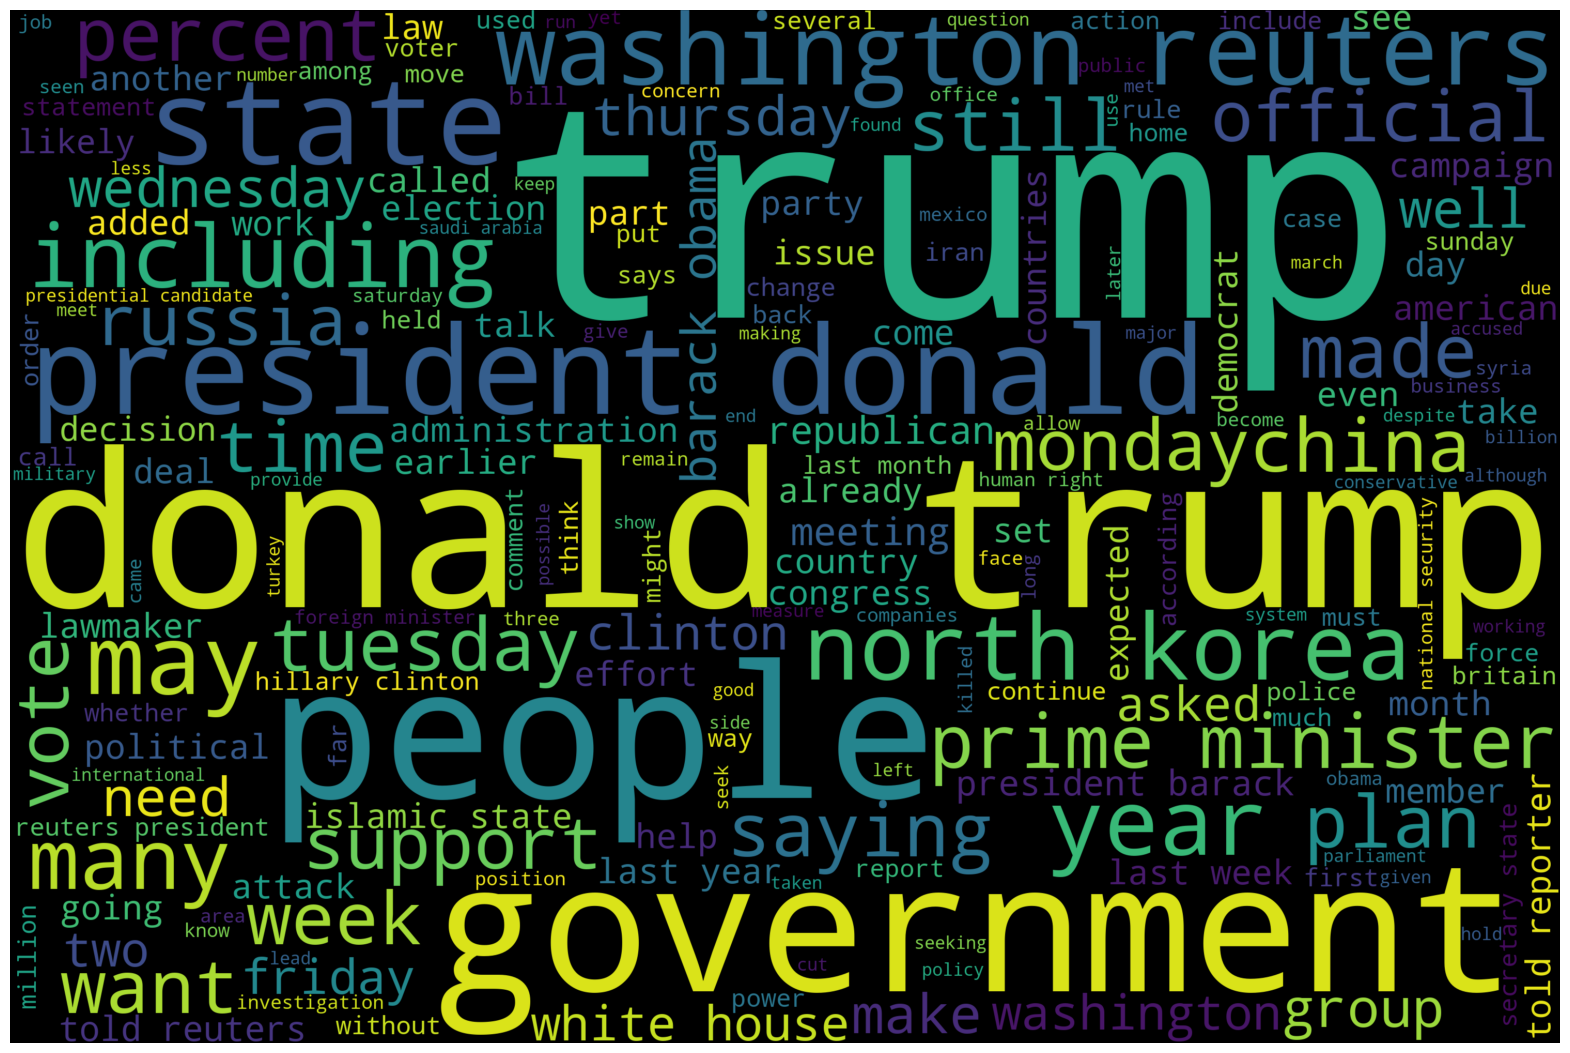

In [114]:
wordcloud1 = WordCloud(width = 3000, height = 2000,background_color='black',stopwords=stopwords)
wordcloud1.generate(all_text_target_1)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [115]:
counter_fake_news = text_target_0.str.split(expand=True).stack().value_counts()
counter_real_news = text_target_1.str.split(expand=True).stack().value_counts()

In [116]:
counter_fake_news

trump                   57095
was                     56373
with                    49142
his                     48782
this                    47825
                        ...  
americauntruthful           1
wereformersadly             1
themselveslatterbut         1
prevailedamerica            1
tremendouslyfeatured        1
Length: 586112, dtype: int64

In [117]:
counter_real_news

with                    42310
was                     39122
has                     38907
not                     33025
his                     32287
                        ...  
nlnnmxb                     1
ankarawashingtonthey        1
provideeach                 1
washingtonled               1
askedbureau                 1
Length: 549160, dtype: int64

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_features=5000, min_df=4, max_df=0.9)
tfidfconverter = TfidfTransformer()
X = df.text
y = df['class']

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [94]:
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_train = tfidfconverter.fit_transform(X_train_vect).toarray()      
print(X_train.shape, y_train.shape)

(33673, 5000) (33673,)


In [95]:
X_test_vect = vectorizer.transform(X_test).toarray()
X_test = tfidfconverter.transform(X_test_vect).toarray()
print(X_test.shape, y_test.shape)

(11225, 5000) (11225,)


In [96]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

classifier = MultinomialNB(alpha=.01)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
test_data_accuracy = accuracy_score(y_test,y_pred)

print(f'Accuracy score of the test data : {test_data_accuracy}\n')
print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy score of the test data : 0.9388864142538975

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5926
           1       0.94      0.94      0.94      5299

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225

0.9386963617546373


Text(95.72222222222221, 0.5, 'Actual')

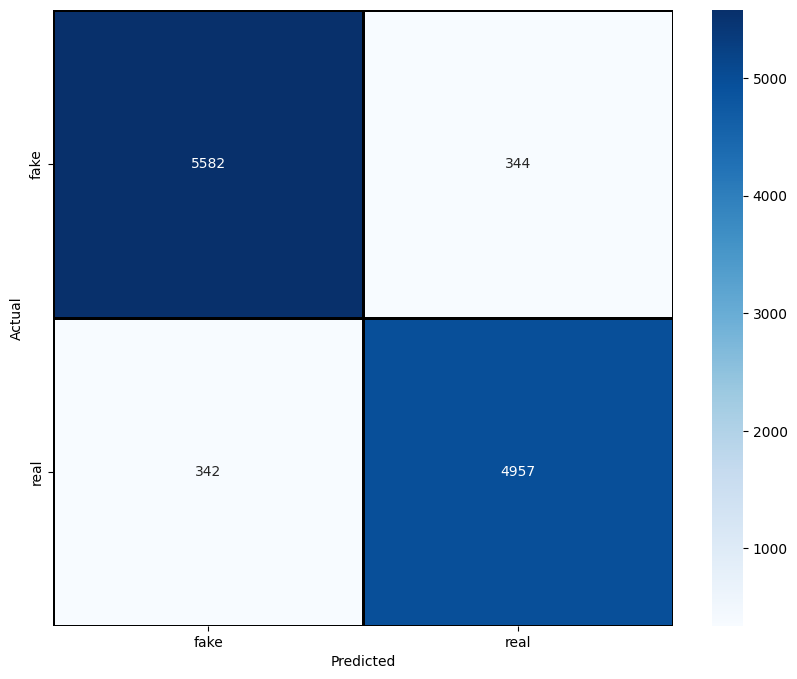

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['fake','real'], 
            yticklabels = ['fake','real'])

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [98]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=10, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy score of the test data : {test_data_accuracy}\n')
print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy score of the test data : 0.9548329621380847

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5926
           1       0.95      0.95      0.95      5299

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225

0.9546902370928887


PIPELINE

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=3000, min_df=4, max_df=0.9)
tfidf = TfidfTransformer()
clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=10, tol=None)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9766889383815888


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7104
           1       0.97      0.98      0.98      6366

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



Text(95.72222222222221, 0.5, 'Actual')

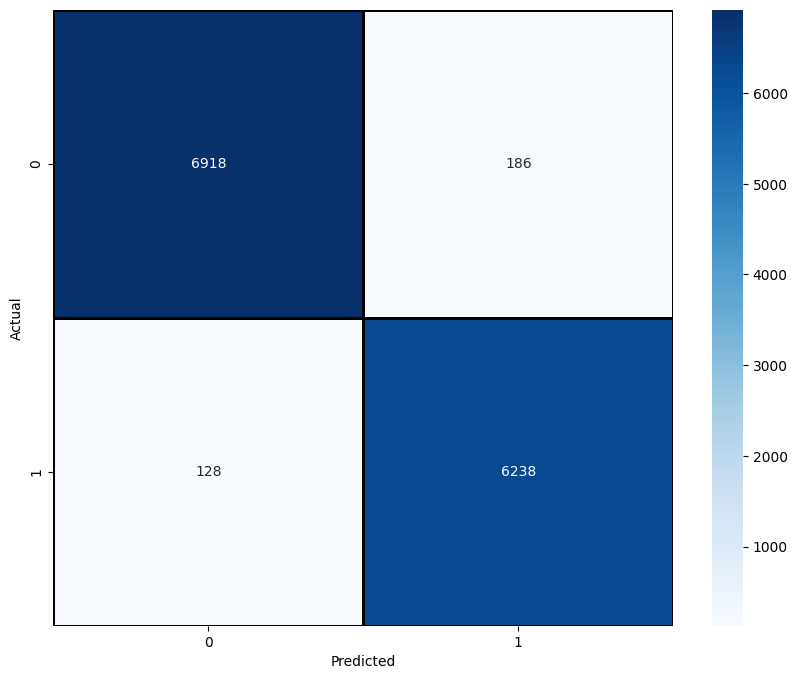

In [64]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['fake','real'], 
            yticklabels = ['fake','real'])

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [66]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.97630501 0.98004632 0.97790449 0.98164647 0.9759444  0.97754811
 0.9743407  0.97843906]
mean=0.9777718203998735
std=0.002178380148029477


In [82]:
pred1 = pipe.predict(['washington reuters the militaryfriday that fourth soldier was killed during attack wednesday niger raising the death toll from incident that has thrown spotlight the counterterrorism mission the west african nation the united states had previously announced that three army special forces soldiers had been killed and another two wounded when joint usnigerien patrol came under attack near the village tongo tongo did not disclose until friday that fourth soldier had been missing officialshis body was found nigerien forces friday morning near the site the ambush ending extensive rescue and recovery mission group has taken responsibility for the killings although officials speaking condition anonymitythe united states suspects local branch islamic state was responsible the military africa command declined publicly name any group butthe american military would hunt down the insurgents absolutely are resolved and stalwart our efforts after those who attacked this joint patrol nigerien and forcesarmy colonel mark cheadle spokesman for the military africa command from initial accounts the member patrol which included about dozen troops came under swift attack militants riding dozen vehicles and about motorcycles islamist militants form part regional insurgency the poor sparsely populated deserts west africa sahel jihadists have stepped attacks peacekeepers malian soldiers and civilian targets since being driven back northern mali frenchled military intervention president donald trump and french president emmanuel macron discussed joint counterterrorism operations the sahel defeat alqaeda and other terrorist groups during call friday the white houselowrisk cheadlethe and nigerien troops had been meeting with local leadership the time the attack what had been seen relatively lowerrisk endeavor for america elite commandos there was not even any armed air cover the time that could carry out air strikes necessary was not meant engagement with the enemy was meant establish relations with the local leaders and the threats the time were deemed unlikely there was overhead armed air cover during the engagementcheadle acknowledged that loss elite forces would trigger review how the military carries out operations but did not suggest any move scale back the american mission the military friday published the names the three army special forces soldiers from special forces group airborne who were killed when their reconnaissance patrol with nigerien forces came under fire they were staff sergeant bryan black puyallup washington staff sergeant jeremiah johnson springboro ohio and staff sergeant dustin wright lyons georgia the militaryhad surged resources niger try locate the missing american soldier cheadlethat included fighter jets helicopters and surveillance assets there was fullcourt press said'])
pred1[0]

1

In [86]:
fake_news_to_pred = cleaned_df.iloc[1][0]

In [88]:
pred2 = pipe.predict([fake_news_to_pred])
pred2[0]

0

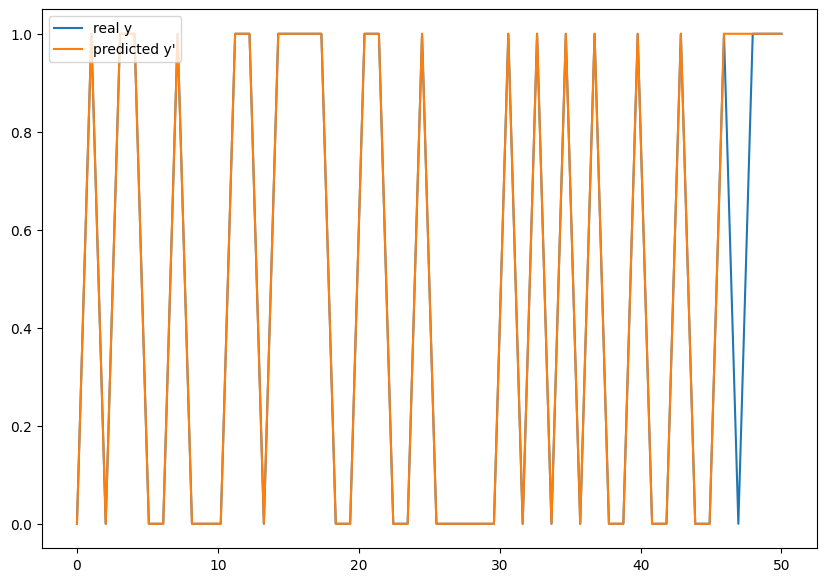

In [68]:
length = y_pred.shape[0] #  
x = np.linspace(0,50,50)

plt.figure(figsize=(10,7))
plt.plot(x, y_test[:50], label='real y')
plt.plot(x, y_pred[:50], label="predicted y'")
plt.legend(loc=2);

In [89]:
# import joblib

# joblib.dump(pipe, "SGD_fakenews_pipe.pkl")

['SGD_fakenews_pipe.pkl']